In [1]:
import datetime as dt

from app.backtesting import Backtester
from app.indicators import OrderedSMAIndicator
from app import models

await models.init_db()

2020-10-25 04:23:15 [INFO]: Tortoise-ORM startup
    connections: {'default': {'engine': 'tortoise.backends.asyncpg', 'credentials': {'host': 'localhost', 'port': 5432, 'user': 'trading', 'password': 'trading', 'database': 'trading'}}}
    apps: {'models': {'models': ['app.models', 'aerich.models']}}


In [2]:
qs = await models.Candle.filter(
    instrument__ticker='AMD',
    time__gte=dt.datetime(2020, 1, 1),
    time__lte=dt.datetime(2020, 10, 24),
    interval='5min',
).order_by('time')

backtester = Backtester.from_db(qs)
indicator = OrderedSMAIndicator()

result = backtester.run(indicator)

100%|██████████| 35557/35557 [01:39<00:00, 357.42it/s]


In [71]:
import pandas as pd

pd.set_option('display.max_rows', 300)
result.positions.sort_values('profit_ratio')

,type,open_time,open_price,close_time,close_price,profit_ratio,equity
757,long,2020-03-19 18:25:00,39.70,2020-03-19 18:35:00,37.97,0.955467,1.217619247107430991946394234
673,long,2020-03-12 03:35:00,46.05,2020-03-12 12:05:00,44.11,0.956914,1.193955639933113575113200092
765,short,2020-03-20 03:40:00,39.47,2020-03-20 12:05:00,41.15,0.960133,1.176718595777730768513224567
638,short,2020-03-09 18:45:00,41.96,2020-03-09 18:50:00,43.74,0.960265,1.123115745888716342102548765
55,short,2020-01-08 12:05:00,45.40,2020-01-08 12:30:00,47.27,0.961401,0.9723018734968702862119180269
...,...,...,...,...,...,...,...
646,long,2020-03-10 03:35:00,42.46,2020-03-10 12:40:00,45.00,1.058762,1.236481888293454619504242236
747,short,2020-03-18 21:35:00,40.32,2020-03-18 23:45:00,37.84,1.066605,1.305835105687830093881480078
541,short,2020-02-28 02:50:00,43.30,2020-02-28 12:55:00,40.60,1.067569,1.258737114239811468613371206
688,short,2020-03-13 00:15:00,40.29,2020-03-13 03:00:00,37.15,1.085607,1.261186189639017968142871966


A mean: 1.0000341111197883
G mean: 1.0000025216730781
TWR: 1.006928222033609


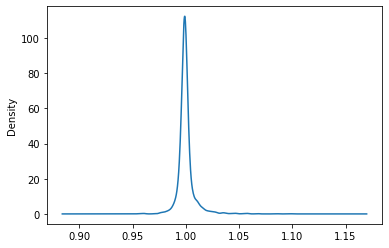

In [72]:
result.profit_density

print(f'A mean: {result.ariph_mean}')
print(f'G mean: {result.geo_mean}')
print(f'TWR: {result.twr}')

In [73]:
result.profit_stats

count    2738.000000
mean        1.000034
std         0.008012
min         0.955467
25%         0.997242
50%         0.999119
75%         1.001364
max         1.098371
Name: profit_ratio, dtype: float64

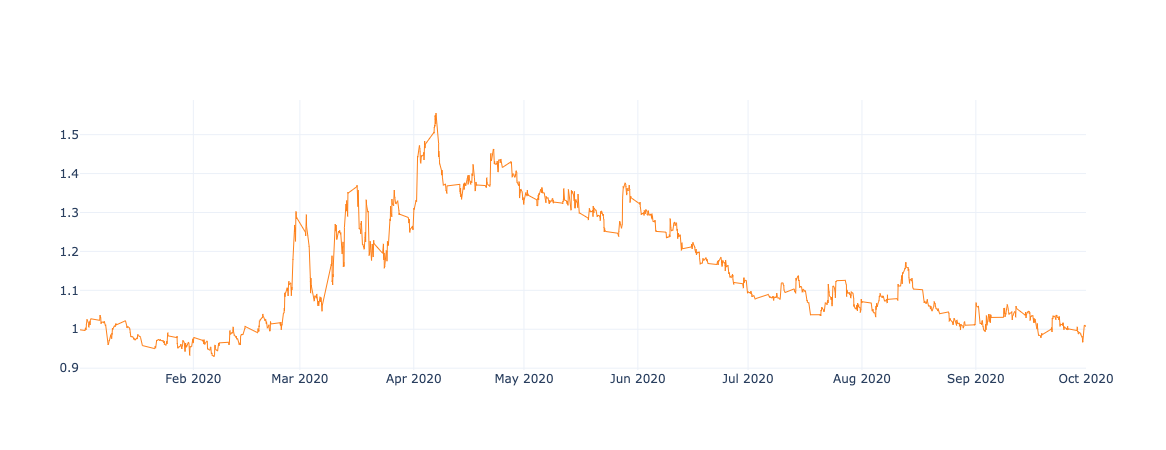

In [74]:
result.equity_graph.show()